# Star Data Analysis

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('star_data.csv')

In [3]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830,1356,-9.93,5.0,Blue,O
236,30839,834042,1194,-10.63,5.0,Blue,O
237,8829,537493,1423,-10.73,5.0,White,A
238,9235,404940,1112,-11.23,5.0,White,A


In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         239 non-null    object 
 1   Luminosity(L/Lo)        239 non-null    object 
 2   Radius(R/Ro)            239 non-null    object 
 3   Absolute magnitude(Mv)  239 non-null    object 
 4   Star type               239 non-null    float64
 5   Star color              239 non-null    object 
 6   Spectral Class          239 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

Temperature (K)           1
Luminosity(L/Lo)          1
Radius(R/Ro)              1
Absolute magnitude(Mv)    1
Star type                 1
Star color                1
Spectral Class            1
dtype: int64

In [7]:
df_clean=df.dropna()

In [8]:
df_clean

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M
5,2840,,0.11,16.98,0.0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830,1356,-9.93,5.0,Blue,O
236,30839,834042,1194,-10.63,5.0,Blue,O
237,8829,537493,1423,-10.73,5.0,White,A
238,9235,404940,1112,-11.23,5.0,White,A


In [12]:
# Replace blank spaces with NaN
df_clean.loc[:,'Star color'] = df_clean['Star color'].replace(' ', np.nan)

In [13]:
most_common_color = df_clean['Star color'].mode()[0]
df_clean.loc[:, 'Star color'] = df_clean['Star color'].fillna(most_common_color)
# Print the unique values to check the imputation
print(df_clean['Star color'].unique())

['Red' 'Blue-White' 'White' 'Yellow-White' 'Blue']


In [14]:
# Convert object columns to numeric, forcing errors to NaN
df_clean.loc[:, 'Temperature (K)'] = pd.to_numeric(df_clean['Temperature (K)'], errors='coerce')
df_clean.loc[:, 'Luminosity(L/Lo)'] = pd.to_numeric(df_clean['Luminosity(L/Lo)'], errors='coerce')
df_clean.loc[:, 'Radius(R/Ro)'] = pd.to_numeric(df_clean['Radius(R/Ro)'], errors='coerce')
df_clean.loc[:, 'Absolute magnitude(Mv)'] = pd.to_numeric(df_clean['Absolute magnitude(Mv)'], errors='coerce')


In [18]:
# Drop rows with any NaN values
df_clean.dropna(inplace=True)

In [19]:
# Verify the data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         220 non-null    float64
 1   Luminosity(L/Lo)        220 non-null    float64
 2   Radius(R/Ro)            220 non-null    float64
 3   Absolute magnitude(Mv)  220 non-null    float64
 4   Star type               220 non-null    float64
 5   Star color              220 non-null    object 
 6   Spectral Class          220 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.8+ KB


In [20]:
# Select only the numeric columns
numeric_df = df_clean[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']]

In [21]:
# Convert the numerical columns to float
numeric_df = numeric_df.astype(float)

In [22]:
# Compute the correlation matrix
corr_matrix = numeric_df.corr()

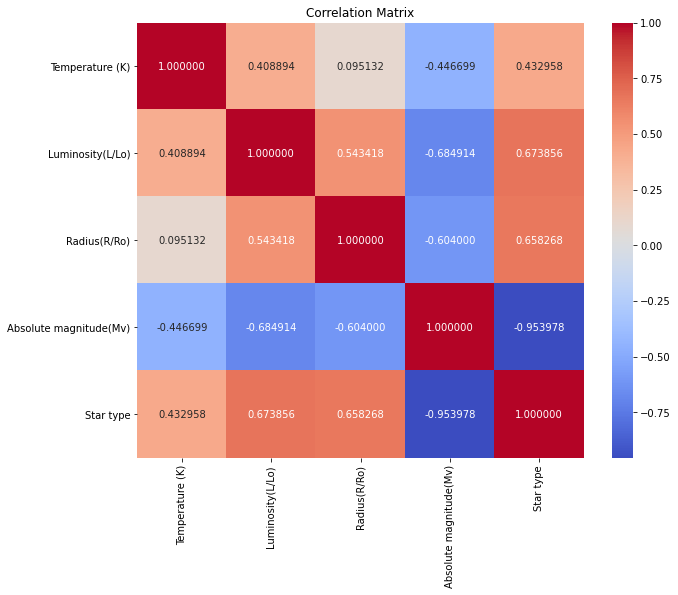

In [23]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='2f')
plt.title('Correlation Matrix')
plt.show()

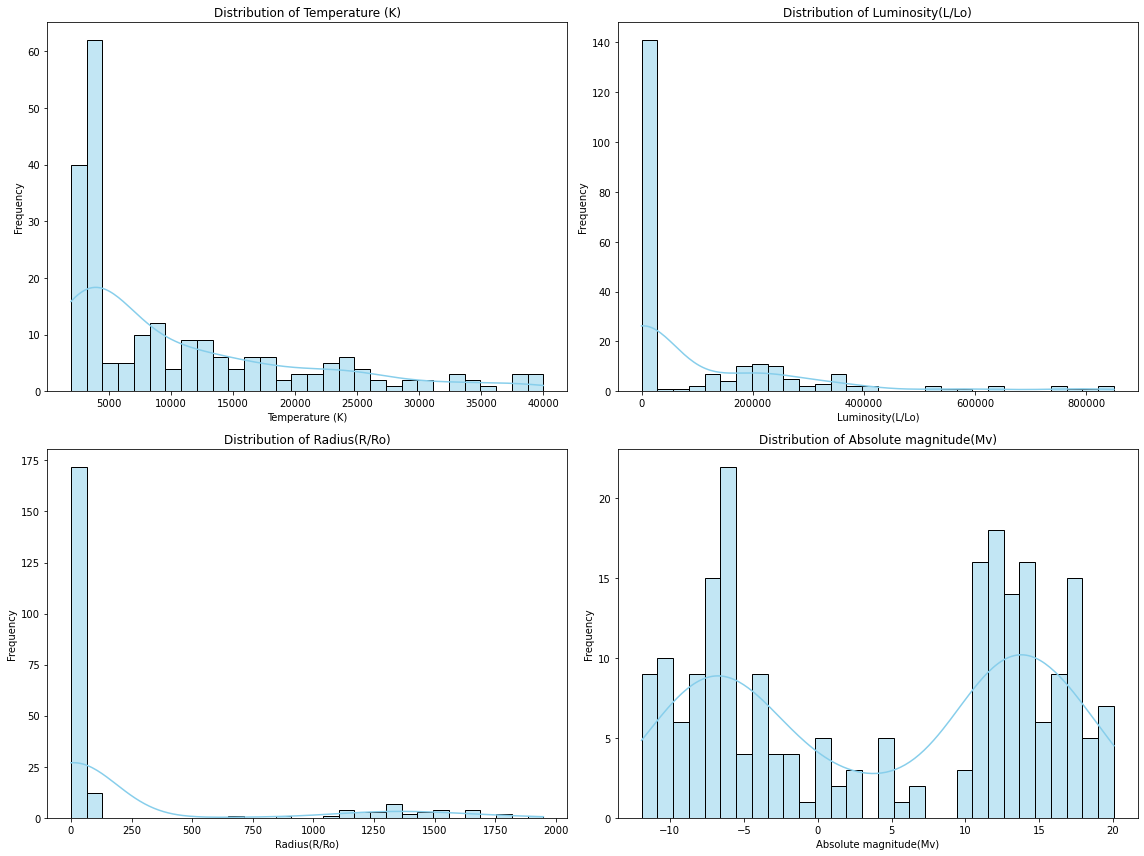

In [24]:
# Plotting distribution for numerical columns
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col].astype(float), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

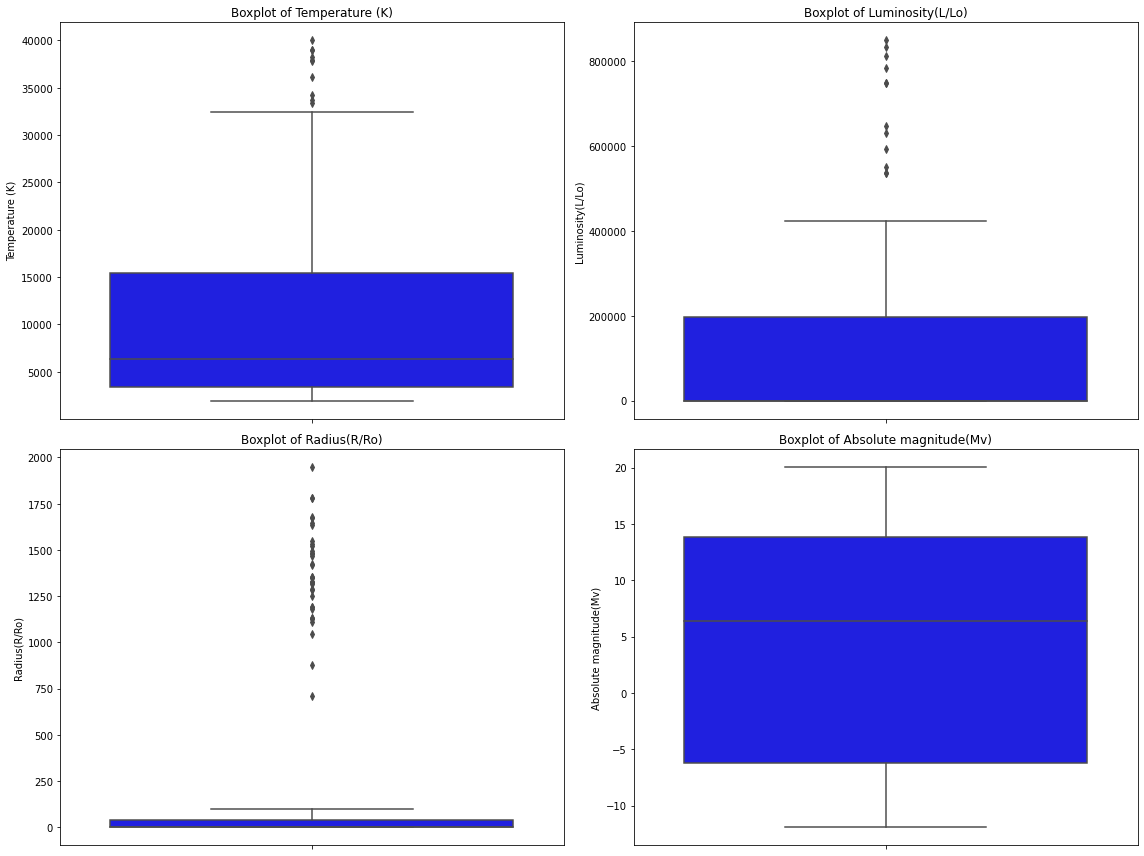

In [25]:
# Boxplot for numerical columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_clean[col].astype(float), color='Blue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

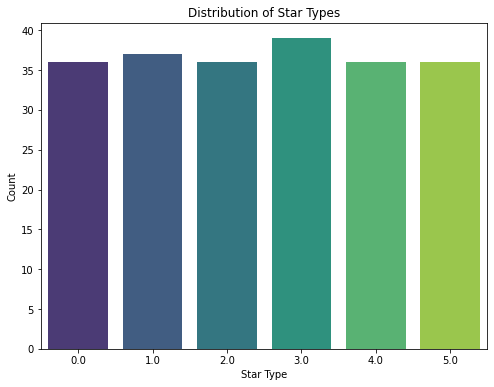

In [26]:
# Distribution of Star types
plt.figure(figsize=(8, 6))
sns.countplot(x='Star type', data=df_clean, palette='viridis')
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()

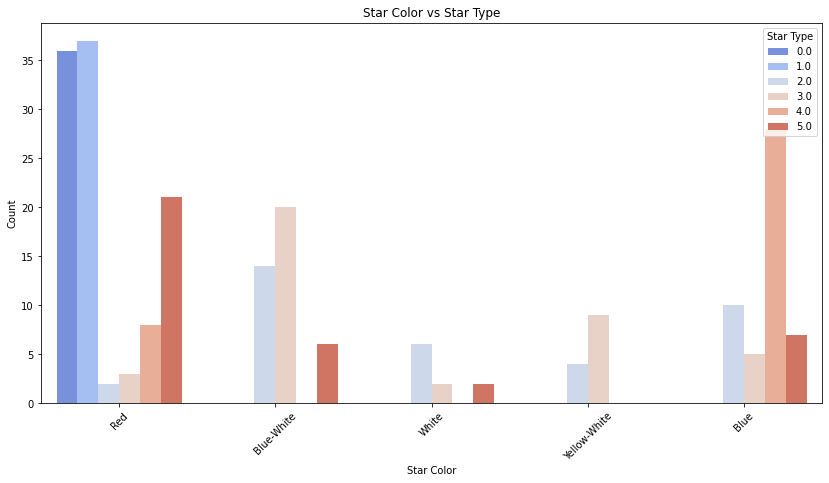

In [27]:
# Count plot of Star color vs Star type
plt.figure(figsize=(14, 7))
sns.countplot(x='Star color', hue='Star type', data=df_clean, palette='coolwarm')
plt.title('Star Color vs Star Type')
plt.xlabel('Star Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Star Type')
plt.show()

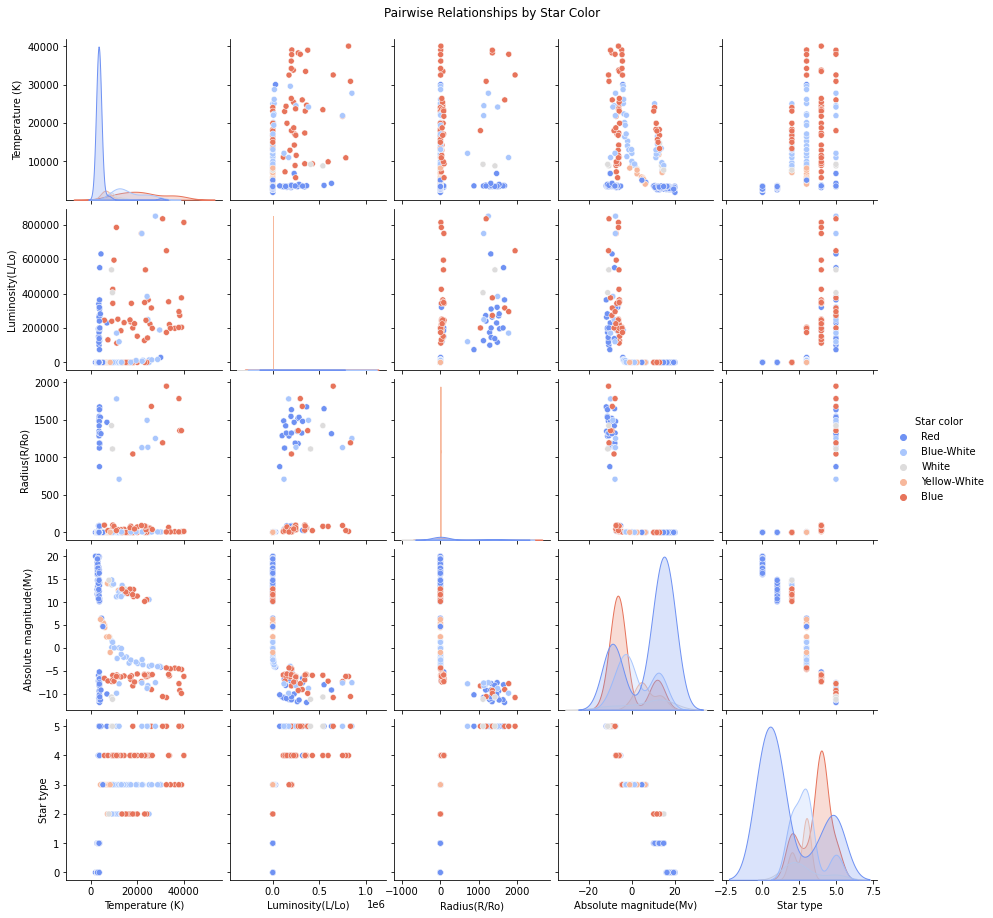

In [28]:
# Pairplot to visualize the relationship between numerical features colored by Star color
sns.pairplot(df_clean, hue='Star color', palette='coolwarm')
plt.suptitle('Pairwise Relationships by Star Color', y=1.02)
plt.show()

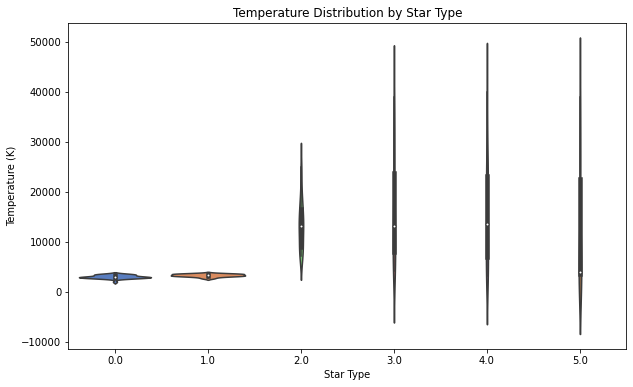

In [29]:
# Violin plot for Temperature across different Star types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Star type', y=df_clean['Temperature (K)'].astype(float), data=df_clean, palette='muted')
plt.title('Temperature Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.show()

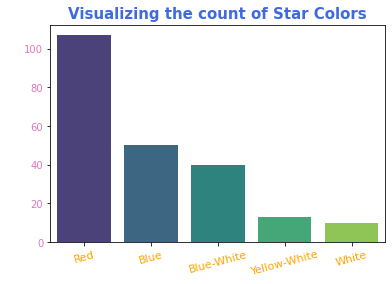

In [122]:
# Visulaising the Star color data
ax = sns.barplot(x=df_clean['Star color'].value_counts().index,
            y= df_clean['Star color'].value_counts(),
            palette='viridis')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star color',color='white', fontsize=13)
plt.yticks(color='tab:pink')
plt.show()

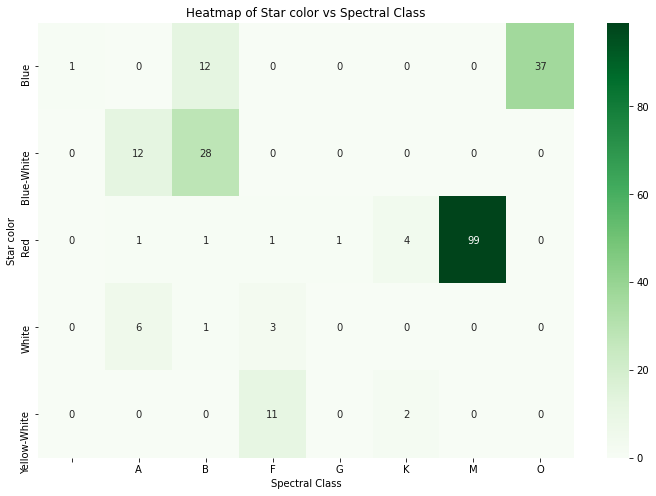

In [123]:
# Crosstab heatmap for Star color and Spectral Class
crosstab = pd.crosstab(df_clean['Star color'], df_clean['Spectral Class'])
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='Greens', fmt='d')
plt.title('Heatmap of Star color vs Spectral Class')
plt.show()

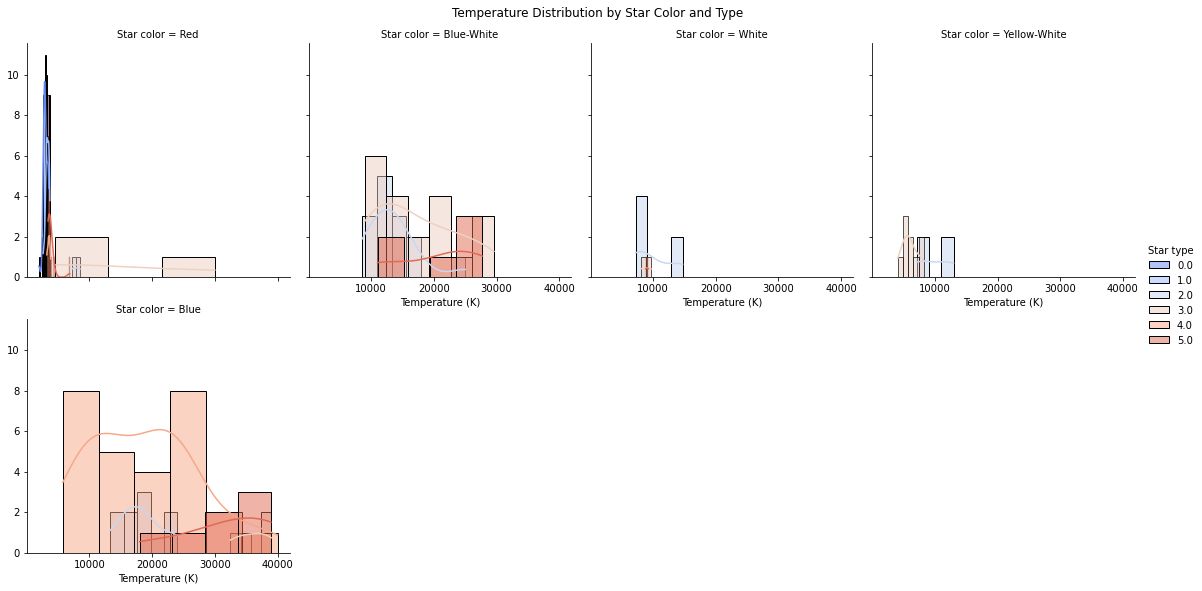

In [124]:
# Facet Grid of Temperature distribution by Star color and Star type
g = sns.FacetGrid(df_clean, col="Star color", hue="Star type", col_wrap=4, height=4, palette='coolwarm')
g.map(sns.histplot, 'Temperature (K)', kde=True)
g.add_legend()
plt.suptitle('Temperature Distribution by Star Color and Type', y=1.02)
plt.show()

In [126]:
# Prepare the features and target variable
X = df_clean[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df_clean['Star type']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Star color', 'Spectral Class'], drop_first=True)

# Convert numerical columns to float
X[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']] = X[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].astype(float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 4  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00        10
         4.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         8

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [127]:
model = RandomForestClassifier()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.97727273 0.97727273 1.         1.         1.        ]
Average Cross-Validation Score: 0.990909090909091
